# TensorFlow Basics

This notebook serves as a starting point for TensorFlow beginners. It covers simple basics such as a multiplication of two constants, using a session, computing a function and a more elaborate implementation of a linear regression.

Help:
- TensorFlow API Documentation [https://www.tensorflow.org/api_docs/](https://www.tensorflow.org/api_docs/)

<hr>

# Multiplying two constants

<hr>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.0.0


In [2]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Does not print the result
print(result)

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


In [7]:
%pip install matplotlib

     |████████████████████████████████| 13.2MB 4.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/df/93/8bc9b52a8846be2b9572aa0a7c881930939b06e4abe1162da6a0430b794f/kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
     |████████████████████████████████| 71kB 17.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Computing a function

- implements y = x^2+b

<hr>

[2 2 1 3 0 2 4 1 4 1]
[ 6  6  3 11  2  6 18  3 18  3]


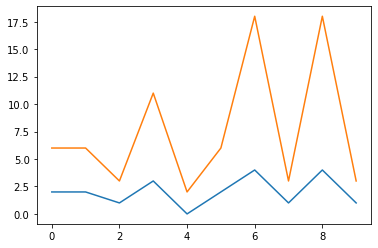

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# define what is needed
def f(x):
    b = 2 # b is a constant of value 2.
    y = tf.square(x)
    y = tf.add(y, b)
    return y

input = np.random.randint(5, size=10)
print(input)
plt.plot(input)
evaled_y = f(input)

# flattens the numpy array
evaled_y = evaled_y.numpy().flatten()
print(evaled_y)
plt.plot(evaled_y)

plt.show()

# Linear regression

- implements a linear regression model for house prices
- as input you have the size of the single houses and their corresponding prices
- covers placeholders and variables

<hr>

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# data as numpy arrays

x_input_train = np.asarray([ 2104,  1600,  2400,  1416,  3000,  1985,  1534,  1427,
  1380,  1494,  1940,  2000,  1890,  4478,  1268,  2300,
  1320,  1236,  2609,  3031,  1767,  1888,  1604,  1962,
  3890,  1100,  1458,  2526,  2200,  2637,  1839,  1000,
  2040,  3137,  1811,  1437,  1239,  2132,  4215,  2162,
  1664,  2238,  2567,  1200,   852,  1852,  1203 ])

y_input_train = np.asarray([ 399900,  329900,  369000,  232000,  539900,  299900,  314900,  198999,
  212000,  242500,  239999,  347000,  329999,  699900,  259900,  449900,
  299900,  199900,  499998,  599000,  252900,  255000,  242900,  259900,
  573900,  249900,  464500,  469000,  475000,  299900,  349900,  169900,
  314900,  579900,  285900,  249900,  229900,  345000,  549000,  287000,
  368500,  329900,  314000,  299000,  179900,  299900,  239500 ])


x_input_test = np.asarray([ 1600, 1494, 1236, 1100, 3137, 2238 ])
y_input_test = np.asarray([ 329900, 242500, 199900, 249900, 579900, 329900 ])

# normalize data
def normalize(array):
    return (array - array.mean()) / array.std()

x_input_train_n = normalize(x_input_train)
y_input_train_n = normalize(y_input_train)
x_input_test_n = normalize(x_input_test)
y_input_test_n = normalize(y_input_test)

Loss is 0.381607995769883
Loss is 0.3624253429217957
Loss is 0.3464153532183816
Loss is 0.33323345382243513
Loss is 0.32238568941204787
Loss is 0.31349290302342886
Loss is 0.3059506174393253
Loss is 0.2997170948075997
Loss is 0.294475871044864
Loss is 0.29021525671644716
Loss is 0.2867726412992594
Loss is 0.2838916523010478
Loss is 0.2815113080109759
Loss is 0.2794816220377925
Loss is 0.27786184597848557
Loss is 0.2764945949153063
Loss is 0.2753719738374313
Loss is 0.2744679486060255
Loss is 0.2736840070141565
Loss is 0.27300421910357847


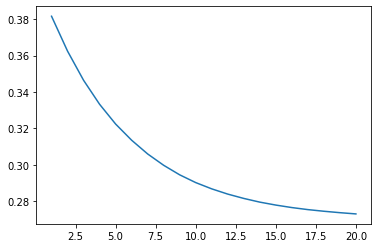

In [56]:
# define hypothesis function
def h(X, weights, bias):
    return tf.tensordot(X, weights, axes=1) + bias

# cost function
def mean_squared_error(Y, y_pred):
    return tf.reduce_mean(tf.square(y_pred - Y))

# derivative of cost function
def mean_squared_error_deriv(Y, y_pred):
    return tf.reshape(tf.reduce_mean(2 * (y_pred - Y)), [1, 1])

# define hyperparameter
num_epochs = 20
batch_size = 1
learning_rate = 0.001


# Build our dataset
dataset = tf.data.Dataset.from_tensor_slices((x_input_train_n, y_input_train_n)) 
dataset = dataset.shuffle(10000).repeat(num_epochs).batch(batch_size)
iterator = dataset.__iter__()

weights = tf.random.normal([1], dtype=tf.double) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range(num_epochs) :
    
    epoch_loss = list()
    for b in range(int(len(x_input_train_n)/batch_size)):
        x_batch , y_batch = iterator.get_next()
   
        output = h(x_batch, weights, bias) 
        loss = epoch_loss.append(mean_squared_error(y_batch, output).numpy())
    
        dJ_dH = mean_squared_error_deriv(y_batch, output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean(dJ_dH * dH_dW)
        dJ_dB = tf.reduce_mean(dJ_dH)
    
        weights -= (learning_rate * dJ_dW)
        bias -= (learning_rate * dJ_dB) 
        
    loss = np.array(epoch_loss).mean()
    epochs_plot.append(i + 1)
    loss_plot.append(loss) 
    
    print('Loss is {}'.format(loss))
    
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [57]:
output = h(x_input_test_n.reshape((-1,1)), weights , bias) 
labels = y_input_test_n

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state(labels, output)
print('Mean Absolute Error = {}'.format(accuracy_op.result().numpy()))

Mean Absolute Error = 0.3517535924911499
